# Part 1: Neural Network

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

"""
https://www.kaggle.com/ashokkumarbibbab/digit-recognizer-machine-learning-model
https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529


Loads the MNIST dataset. This is a dataset of 60,000 28x28 
grayscale images of the 10 digits, 
along with a test set of 10,000 images.
"""
from keras.models import Sequential,model_from_json

"""
to_json() and tf.keras.models.model_from_json()

This is similar to get_config / from_config, except 
it turns the model into a JSON string, which can then be loaded
without the original model class. 
It is also specific to models, it isn't meant for layers.

Keras provides the ability to describe any model using JSON format with 
a to_json() function. This can be saved to file and later loaded via 
the model_from_json() 
function that will create a new model from the JSON specification

sequential : import
The Keras Python library makes creating deep learning models fast and easy. 
The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models 
that share layers or have multiple inputs or outputs.

JSON Stands for Javascript Object Notion. It is used for 
transferring data between the server and the client just like XML.
"""
from keras.layers import Dense
from keras.optimizers import RMSprop
"""
Available optimizers
SGD
RMSprop
Adam
Adadelta
Adagrad
Adamax
Nadam
Ftrl

RMSprop:
Optimizer that implements the RMSprop algorithm.
The gist of RMSprop is to:
Maintain a moving (discounted) average of the square of gradients
Divide the gradient by the root of this average

The centered version additionally maintains a moving average of the gradients, 
and uses that average to estimate the variance.


Arguments

learning_rate: A Tensor, floating point value, or a schedule that is a tf.keras.optimizers.schedules.LearningRateSchedule, or a callable that takes no arguments and returns the actual value to use. The learning rate. Defaults to 0.001.
rho: Discounting factor for the history/coming gradient. Defaults to 0.9.
momentum: A scalar or a scalar Tensor. Defaults to 0.0.
epsilon: A small constant for numerical stability. This epsilon is "epsilon hat" in the Kingma and Ba paper (in the formula just before Section 2.1), not the epsilon in Algorithm 1 of the paper. Defaults to 1e-7.
centered: Boolean. If True, gradients are normalized by the estimated variance of the gradient; if False, by the uncentered second moment. Setting this to True may help with training, but is slightly more expensive in terms of computation and memory. Defaults to False.
name: Optional name prefix for the operations created when applying gradients. Defaults to "RMSprop".
**kwargs: Keyword arguments. Allowed to be one of "clipnorm" or "clipvalue". "clipnorm" (float) clips gradients by norm; "clipvalue" (float) clips gradients by value.
"""

import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [5]:
from tensorflow import keras
#from keras.utils import to_categorical
batch_size = 128
num_classes = 10
epochs = 2
"""
The MNIST dataset is a large database of handwritten digits. 
It commonly used for training various image processing systems. 
MNIST is short for
Modified National Institute of Standards and Technology database.
"""
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


### Visualize Data

Label: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


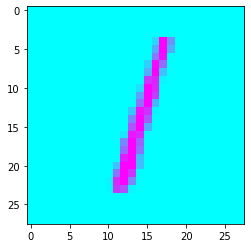

"\nmatplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)[source]\nDisplay data as an image, i.e., on a 2D regular raster.\n\nThe input may either be actual RGB(A) data, \nor 2D scalar data, which will be rendered as a pseudocolor image.\nFor displaying a grayscale image set up the colormapping \nusing the parameters cmap='gray', vmin=0, vmax=255.\n\n"

In [6]:
# camp =cool camp='rainbow'   'gray'
print("Label:",y_test[2:3])
plt.imshow(x_test[2:3].reshape(28,28), cmap='cool')
plt.show()

"""
matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)[source]
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, 
or 2D scalar data, which will be rendered as a pseudocolor image.
For displaying a grayscale image set up the colormapping 
using the parameters cmap='gray', vmin=0, vmax=255.

"""

#### Note: Images are also considered as numerical matrices

### Design a model

In [7]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
"""
Design a model(Image size in CIFAR-10 is 32 x 32 x 3.) 
and MNIST is 28 x 28 x 1(black & white image contains only 1 channel). 
Total number of neurons in input layer will 28 x 28 = 784

The “Param #” column shows you the number of parameters that
are trained for each layer

Model summary. The model summary table reports the strength of the
relationship between the model and the dependent variable. R, 
the multiple correlation coefficient, is the 
linear correlation between the observed and model-predicted values of the dependent variable. 
Its large value indicates a strong relationship.

Trainable parameters are the number of, well,
trainable elements in your network; neurons that 
are affected by backpropagation. For example, 
for the Wx + b operation in each neuron, W and b are
trainable – because they are changed by optimizers after 
backpropagation was applied for gradient computation.

To calculate the learnable parameters here, 
all we have to do is just multiply the by the shape of width m, 
height n, previous layer's filters d and account 
for all such filters k in the current layer. 
Don't forget the bias term for each of the filter.

model. summary() to print a useful summary of the model, 
which includes: Name and type of all layers in the model.
Output shape for each layer.
"""
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


### Weights before Training

Shape of First Layer (784, 32)
Visualization of First Layer


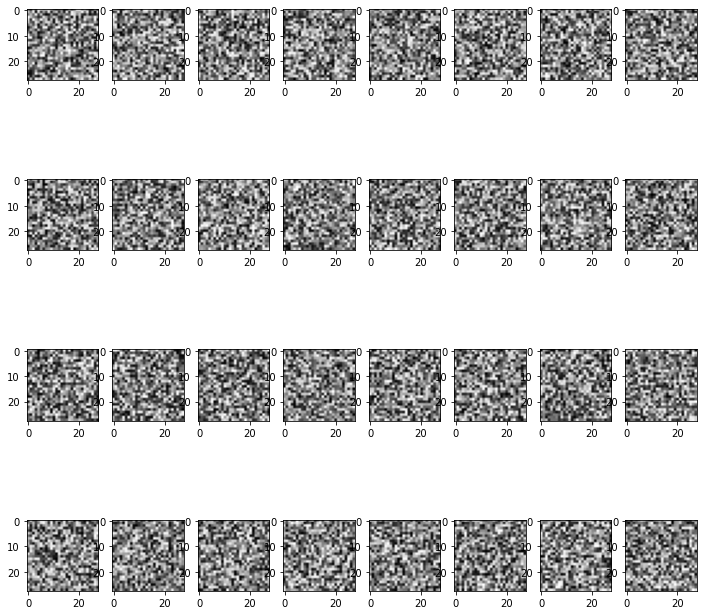

In [8]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Compiling a Model

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

"""
The RMSprop optimizer restricts the oscillations in the vertical direction.
Therefore, we can increase our learning rate and our algorithm could take
larger steps in the horizontal direction converging faster. 
The difference between RMSprop and gradient descent 
is on how the gradients are calculated.


import tensorflow as tf

model.compile(loss='binary_crossentropy',

  optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),

  metrics=['acc'])

model.compile(loss='binary_crossentropy',

  optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),

  metrics=['acc'])

"""


'\nThe RMSprop optimizer restricts the oscillations in the vertical direction.\nTherefore, we can increase our learning rate and our algorithm could take\nlarger steps in the horizontal direction converging faster. \nThe difference between RMSprop and gradient descent \nis on how the gradients are calculated.\n'

### Training

In [10]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=6,
            epochs=3,
                    verbose=1)


Epoch 1/3
10000/10000 [==============================] - 23s 850us/step - loss: 1.0536 - accuracy: 0.6803
Epoch 2/3
10000/10000 [==============================] - 10s 1ms/step - loss: 0.2691 - accuracy: 0.9241
Epoch 3/3
10000/10000 [==============================] - 11s 1ms/step - loss: 0.2042 - accuracy: 0.9428
Object `fit()` not found.


### Testing

In [11]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19332773983478546
Test accuracy: 0.9444000124931335


### Weights after Training

Shape of First Layer (784, 32)
Visualization of First Layer


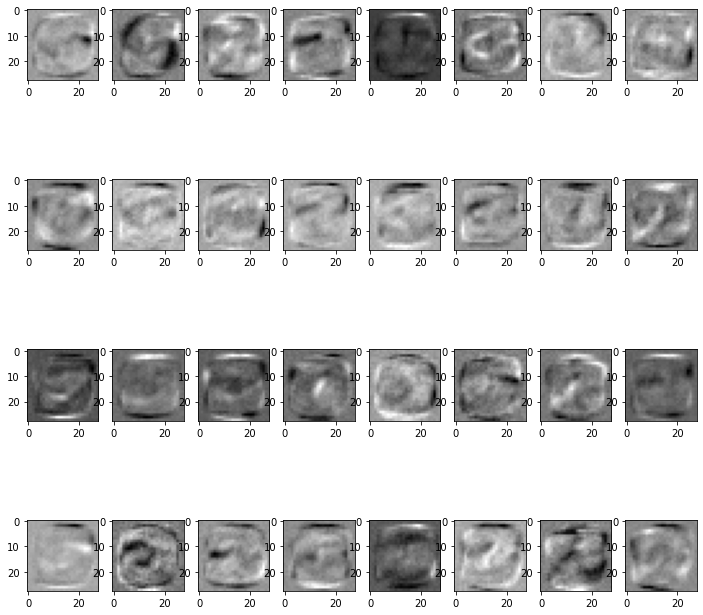

In [12]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Take away
* This internal representation reflects Latent Variables
* Each of the nodes will look for a specific pattern in the input
* A node will get activated if input is similar to the feature it looks for
* Each node is unique and often orthogonal to each other

### Prediction

In [13]:
# Write the index of the test sample to test
prediction = model.predict(x_test)
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [3.6969943e-06 2.0298363e-05 1.9881891e-05 2.6343358e-04 3.6978389e-07
 8.7590172e-07 5.6638253e-08 9.9866140e-01 2.3922460e-06 1.0274897e-03]

Thresholded output
 [0 0 0 0 0 0 0 1 0 0]


### Ground truth

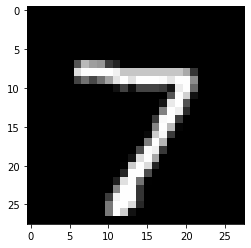

In [14]:
# Write the index of the test sample to show
plt.imshow(x_test[0].reshape(28,28),cmap='gray')
plt.show()

### User Input

[[[238 162 126]
  [238 162 126]
  [238 162 126]
  ...
  [236 159 127]
  [236 159 127]
  [235 158 126]]

 [[238 162 126]
  [238 162 126]
  [238 162 126]
  ...
  [236 159 127]
  [236 159 127]
  [235 158 126]]

 [[238 162 126]
  [238 162 126]
  [238 162 126]
  ...
  [236 159 127]
  [236 159 127]
  [235 158 126]]

 ...

 [[209 141 112]
  [209 141 112]
  [209 141 112]
  ...
  [197 134 106]
  [197 135 105]
  [197 135 105]]

 [[209 141 112]
  [209 141 112]
  [209 141 112]
  ...
  [198 135 107]
  [197 135 105]
  [197 135 105]]

 [[209 141 112]
  [209 141 112]
  [209 141 112]
  ...
  [198 135 107]
  [197 135 105]
  [197 135 105]]]


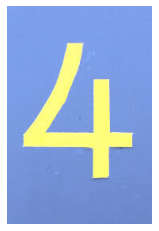

In [15]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt
"""
OpenCV-Python is a library of Python bindings designed to solve 
computer vision problems. cv2. imread() method loads an image 
from the specified file. If the image cannot be read 
(because of missing file, improper permissions, unsupported or invalid format) 
then this method returns an empty matrix
"""

# Load image in color
image_bgr = cv2.imread('E:\\2021\\notes 2021\\CSA501 Deep learning_amity\\data set\\digit.jpeg', cv2.IMREAD_COLOR)
# Convert to RGB
print(image_bgr)

#print(get_string(image_bgr + "digit.jpg"))
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb),plt.axis("off")
plt.show()

### Convert to grayscale and resize

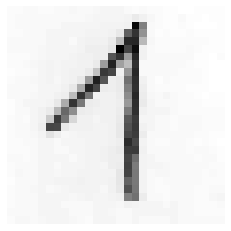

In [27]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('E:\\2021\\notes 2021\\CSA501 Deep learning_amity\\data set\\digit1.jpeg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

### Prediction

In [28]:
#prediction
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [9.7299743e-01 7.1937286e-08 5.4686391e-03 1.9406155e-04 2.6620051e-04
 4.3691280e-03 1.6552757e-02 9.8394019e-05 1.7774079e-05 3.5533329e-05]

Thresholded Score:
 [1 0 0 0 0 0 0 0 0 0]

Predicted Digit:
 0


# Part 2: Saving, Loading and Retraining Models

### Saving a model

In [29]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### Loading a model

In [30]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Retraining a model

In [31]:
#Retraining a model
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 4s 4ms/step - loss: 0.1666 - accuracy: 0.9533
Epoch 2/2
469/469 [==============================] - 2s 3ms/step - loss: 0.1518 - accuracy: 0.9564
Test loss: 0.16083700954914093
Test accuracy: 0.9544000029563904


### Saving a model and resuming the training later is the great relief in training large neural networks !

# Part 3: Activation Functions

### Sigmoid Activation Function

In [32]:
#Sigmoid Activation Function (part3 )
#Activation Functions
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(784,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 5s 5ms/step - loss: 2.1450 - accuracy: 0.3342 - val_loss: 1.6995 - val_accuracy: 0.5998
Epoch 2/2
469/469 [==============================] - 2s 4ms/step - loss: 1.5803 - accuracy: 0.6135 - val_loss: 1.2441 - val_accuracy: 0.7063
Test loss: 1.2441320419311523
Test accuracy: 0.7063000202178955


### Relu Activation Function

In [1]:
# Write your code here 

# Use the same model design from the above cell 

### What are your findings?

### Other Activation Functions
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Tips
* Relu is commonly used in most hidden layers
* In case of dead neurons, use leaky Relu

# Part 4: Design Choices in Neural Networks

### Design a model with Low Number of Nodes. For Example 8

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 5s 6ms/step - loss: 2.0989 - accuracy: 0.4279 - val_loss: 1.3567 - val_accuracy: 0.7289
Epoch 2/2
469/469 [==============================] - 2s 4ms/step - loss: 1.1553 - accuracy: 0.7800 - val_loss: 0.6952 - val_accuracy: 0.8552
Test loss: 0.6952221989631653
Test accuracy: 0.8551999926567078
Shape of First Layer (784, 8)
Visual

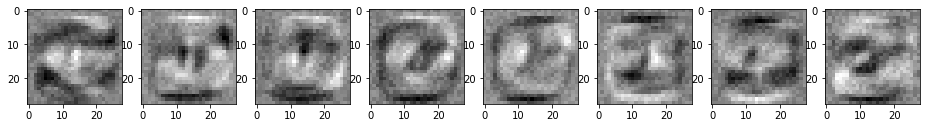

In [33]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with Higher Number of Nodes. For example 128

In [2]:
# Write your code here 

# Use the same layer design from the above cell 

### Lower number of Layers. For example 1 hidden layer

In [34]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                50        
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 6s 6ms/step - loss: 1.7594 - accuracy: 0.3493 - val_loss: 0.8991 - val_accuracy: 0.7364
Epoch 2/2
469/469 [==============================] - 2s 4ms/step - loss: 0.8318 - accuracy: 0.7657 - val_loss: 0.6625 - val_accuracy: 0.8193
Test loss: 0.6625487804412842
Test accuracy: 0.8192999958992004


### Lower number of Layers. For example 4 hidden layers

In [3]:
# Write your code here 

# Use the same number of units from the above cell 


### Tips
* Choice of number of nodes and layers are application oriented i.e. trial and error
* Designing a neural network and reasoning the results is more of an art than a science